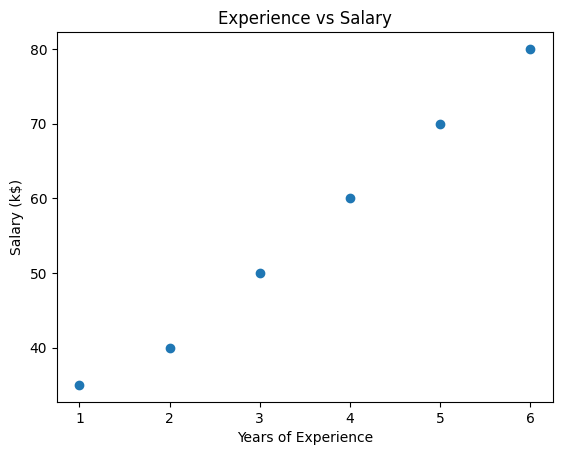

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tiny dataset: Years of Experience vs Salary
data = {'YearsExperience': [1, 2, 3, 4, 5, 6],
        'Salary': [35, 40, 50, 60, 70, 80]}
df = pd.DataFrame(data)
df

# Visualize
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary (k$)")
plt.title("Experience vs Salary")
plt.show()


In [ ]:
# Rule-based approach
def predict_salary_manual(years):
    return 30 + years * 8

for x in [2, 5]:
    print(f"Manual rule: {x} yrs -> ${predict_salary_manual(x)}k")


In [ ]:
# ML approach
from sklearn.linear_model import LinearRegression

X = df[['YearsExperience']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)

print("\nLearned Coefficient:", model.coef_[0])
print("Learned Intercept:", model.intercept_)

# Predict a new value
new_exp = [[7]]
print(f"Predicted Salary for 7 years experience: ${model.predict(new_exp)[0]:.2f}k")


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[15,39],[16,81],[17,6],[18,77],[19,40],[20,76]])
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customers before Clustering")
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='cool')
plt.title("Customer Groups after Clustering")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
df = iris.frame

X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_acc, test_acc = [], []
for d in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(range(1,10), train_acc, label='Train Accuracy')
plt.plot(range(1,10), test_acc, label='Test Accuracy')
plt.xlabel('Tree Depth'); plt.ylabel('Accuracy'); plt.legend()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()